In [1]:
from fastai.vision.all import *
import pandas as pd
import os

In [2]:
path = untar_data(URLs.MNIST)
path_training = path/'training'
path = untar_data(URLs.MNIST)
path_testing = path/'testing'

In [3]:
dls = ImageDataLoaders.from_folder(path_training, valid_pct=0.2, seed=12, item_tfms=Resize(224))

In [4]:
len(dls.train_ds)

48000

In [5]:
len(dls.valid_ds)

12000

In [6]:
batch = dls.one_batch()
print(f"Batch shape: {batch[0].shape}")
print(f"Labels: {batch[1]}")

Batch shape: torch.Size([64, 3, 224, 224])
Labels: TensorCategory([3, 7, 2, 5, 1, 8, 0, 0, 5, 9, 6, 9, 5, 9, 8, 2, 2, 9, 3, 8, 2,
                1, 9, 8, 4, 0, 0, 2, 9, 9, 2, 5, 1, 6, 9, 1, 2, 0, 4, 1, 9, 7,
                1, 7, 9, 3, 9, 3, 8, 6, 1, 1, 7, 4, 8, 0, 7, 8, 2, 9, 2, 6, 0,
                8])


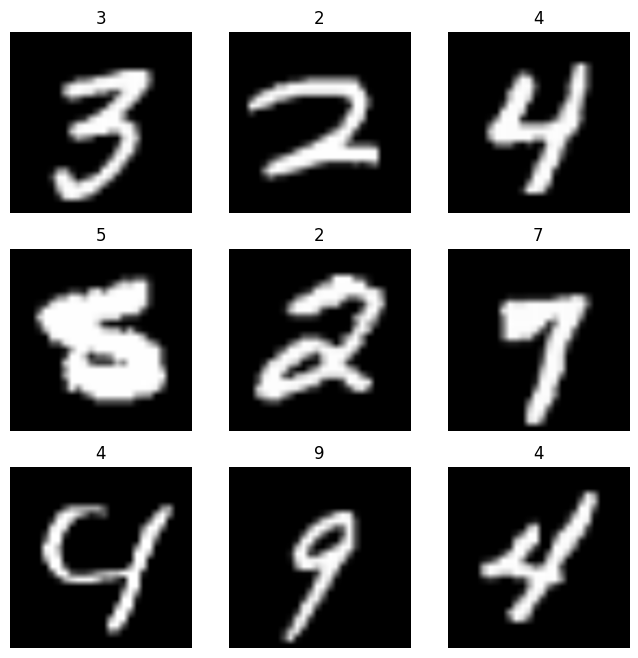

In [7]:
dls.show_batch(max_n=9, figsize=(8,8))

In [8]:
dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [9]:
x, y = dls.train_ds[0]
print(f"Image shape: {x.shape}")
print(f"Label: {y}")

Image shape: (28, 28)
Label: TensorCategory(2)


In [10]:
x

In [11]:
#learn = vision_learner(dls, resnet34, metrics=accuracy)
#learn.fine_tune(1)

In [12]:
#learn.export("/home/work/Codes/fastai-learning/01_mnist_experiment.pkl")

In [13]:
learn = load_learner("/home/work/Codes/fastai-learning/01_mnist_experiment.pkl")

In [14]:
img = PILImage.create(path_testing/"0"/"3.png")

In [15]:
learn.predict(img)

('0',
 tensor(0),
 tensor([1.0000e+00, 7.3863e-09, 1.7634e-09, 2.5240e-10, 3.5266e-09, 2.2647e-08,
         4.0782e-06, 3.1165e-08, 2.9253e-08, 2.7924e-08]))

In [16]:
path_testing

Path('/home/work/.fastai/data/mnist_png/testing')

In [17]:
data = []
for category in os.listdir(path_testing):
    category_path = path_testing/category
    for file in os.listdir(category_path):
        data.append({"filename": path_testing/category/file, "target_class": category})

In [18]:
data[0:10]

[{'filename': Path('/home/work/.fastai/data/mnist_png/testing/5/8656.png'),
  'target_class': '5'},
 {'filename': Path('/home/work/.fastai/data/mnist_png/testing/5/187.png'),
  'target_class': '5'},
 {'filename': Path('/home/work/.fastai/data/mnist_png/testing/5/5488.png'),
  'target_class': '5'},
 {'filename': Path('/home/work/.fastai/data/mnist_png/testing/5/7195.png'),
  'target_class': '5'},
 {'filename': Path('/home/work/.fastai/data/mnist_png/testing/5/9616.png'),
  'target_class': '5'},
 {'filename': Path('/home/work/.fastai/data/mnist_png/testing/5/8232.png'),
  'target_class': '5'},
 {'filename': Path('/home/work/.fastai/data/mnist_png/testing/5/7077.png'),
  'target_class': '5'},
 {'filename': Path('/home/work/.fastai/data/mnist_png/testing/5/857.png'),
  'target_class': '5'},
 {'filename': Path('/home/work/.fastai/data/mnist_png/testing/5/469.png'),
  'target_class': '5'},
 {'filename': Path('/home/work/.fastai/data/mnist_png/testing/5/4381.png'),
  'target_class': '5'}]

In [19]:
df = pd.DataFrame(data)

In [20]:
df.head()

,filename,target_class
0,/home/work/.fastai/data/mnist_png/testing/5/8656.png,5
1,/home/work/.fastai/data/mnist_png/testing/5/187.png,5
2,/home/work/.fastai/data/mnist_png/testing/5/5488.png,5
3,/home/work/.fastai/data/mnist_png/testing/5/7195.png,5
4,/home/work/.fastai/data/mnist_png/testing/5/9616.png,5


In [21]:
df['target_class'].unique()

array(['5', '1', '7', '0', '6', '2', '9', '8', '3', '4'], dtype=object)

In [22]:
def predict_image(img_path):
    return str(learn.predict(img_path)[0])

In [23]:
test_prediction_img = predict_image(df['filename'][0])

In [24]:
type(test_prediction_img)

str

In [25]:
test_prediction_img

'5'

In [26]:
with learn.no_bar(), learn.no_logging():
    for index, row in df.iterrows():
        df.at[index, 'predict_class'] = predict_image(row['filename'])

In [27]:
df.head()

,filename,target_class,predict_class
0,/home/work/.fastai/data/mnist_png/testing/5/8656.png,5,5
1,/home/work/.fastai/data/mnist_png/testing/5/187.png,5,5
2,/home/work/.fastai/data/mnist_png/testing/5/5488.png,5,5
3,/home/work/.fastai/data/mnist_png/testing/5/7195.png,5,5
4,/home/work/.fastai/data/mnist_png/testing/5/9616.png,5,5


In [28]:
len(df)

10000

In [29]:
type(df['target_class'][0])

str

In [30]:
type(df['predict_class'][0])

str

In [31]:
df['accurate_prediction'] = df.apply(lambda row: row['target_class'] == row['predict_class'], axis=1)

In [32]:
df.head()

,filename,target_class,predict_class,accurate_prediction
0,/home/work/.fastai/data/mnist_png/testing/5/8656.png,5,5,True
1,/home/work/.fastai/data/mnist_png/testing/5/187.png,5,5,True
2,/home/work/.fastai/data/mnist_png/testing/5/5488.png,5,5,True
3,/home/work/.fastai/data/mnist_png/testing/5/7195.png,5,5,True
4,/home/work/.fastai/data/mnist_png/testing/5/9616.png,5,5,True


In [33]:
total_wrong_predictions = (~df['accurate_prediction']).sum()

In [34]:
total_wrong_predictions

np.int64(59)

In [42]:
wrong_predictions = df[~df['accurate_prediction']]

In [43]:
wrong_predictions

,filename,target_class,predict_class,accurate_prediction
20,/home/work/.fastai/data/mnist_png/testing/5/9729.png,5,6,False
114,/home/work/.fastai/data/mnist_png/testing/5/674.png,5,3,False
197,/home/work/.fastai/data/mnist_png/testing/5/5735.png,5,3,False
592,/home/work/.fastai/data/mnist_png/testing/5/2597.png,5,3,False
875,/home/work/.fastai/data/mnist_png/testing/5/2035.png,5,3,False
1164,/home/work/.fastai/data/mnist_png/testing/1/716.png,1,7,False
1481,/home/work/.fastai/data/mnist_png/testing/1/6783.png,1,6,False
1536,/home/work/.fastai/data/mnist_png/testing/1/2018.png,1,7,False
1846,/home/work/.fastai/data/mnist_png/testing/1/3073.png,1,7,False
2154,/home/work/.fastai/data/mnist_png/testing/7/3808.png,7,5,False


In [44]:
percentage_incorrect = len(wrong_predictions)/len(df)

In [46]:
print(f"Incorrect values: {percentage_incorrect*100} %")

Incorrect values: 0.59 %
